In [136]:
import importlib

In [137]:
import copy
import numpy as np
import matplotlib.colors as mplcols
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [179]:
import PIPPET, utils
importlib.reload(PIPPET)
importlib.reload(utils)
;

''

## Plotting utils

In [18]:
#%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

plt.style.use('default')
  
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.autolayout'] = False
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
sns.set_context('paper', font_scale=0.9)

# metronome start, with central tendency

In [19]:
taus, dtau = np.linspace(1.2*2*np.pi, 2.4*2*np.pi, num=20, retstep = True)

(taus[1:]+taus[:-1])/2

array([ 7.73823875,  8.1350715 ,  8.53190426,  8.92873702,  9.32556977,
        9.72240253, 10.11923528, 10.51606804, 10.9129008 , 11.30973355,
       11.70656631, 12.10339907, 12.50023182, 12.89706458, 13.29389733,
       13.69073009, 14.08756285, 14.4843956 , 14.88122836])

In [172]:
p_ = PIPPET.PIPPETParams()
p_.dt = 0.0005
p_.overtime = 3
p_.sigma_phi = 0.5
p_.mu_0 = 0
p_.V_0 = 10


p_.eta_mu = 0.0
p_.eta_V = 0.0


p_.sigma_theta = .75#.25#0.12

p_.tau_p = 2*np.pi/.8
p_.tau_p_tendency = .1


e_means   = np.array([0,])
e_vars    = np.array([0.1,])/(2*np.pi/.54)**2
e_lambdas = np.array([0.02,])
lambda_0 = 0.001

p_.tempo_scaling = True





In [175]:


p_g_down = copy.deepcopy(p_)

e_times = np.array([1.0, 1.8, 2.6])


p_g_down.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')

m_g_down = PIPPET.gcPATIPPET(p_g_down, taus=taus, prior=None)
m_g_down.run()


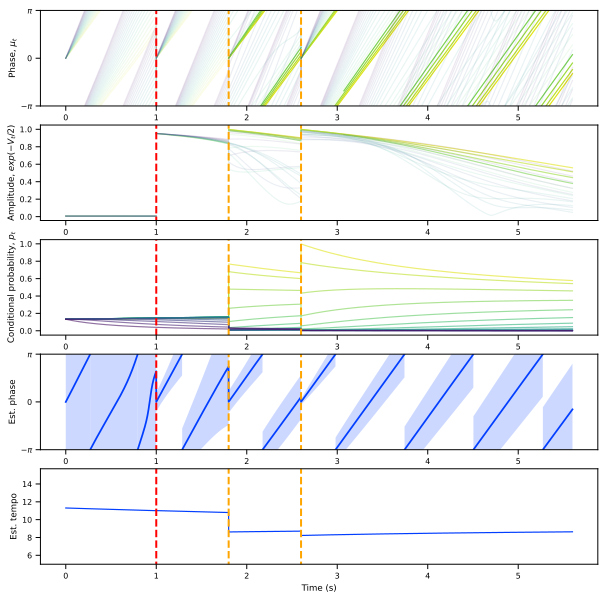

In [180]:

fig = utils.plot_gcPATIPPET(m_g_down, -1, 0,  -1, '', .1/dtau, [5,2*np.pi/.4])
#fig.savefig('figures/gc_slowdown.pdf', bbox_inches='tight');

In [176]:
p_v_down = copy.deepcopy(p_)

p_v_down.V_theta_0 = 1
p_v_down.S_0 = 0
p_v_down.theta_0 = 2*np.pi/.7

e_times = np.array([1.0, 1.8, 2.6])

p_v_down.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')

m_v_down= PIPPET.vcPATIPPET(p_v_down)

m_v_down.run()


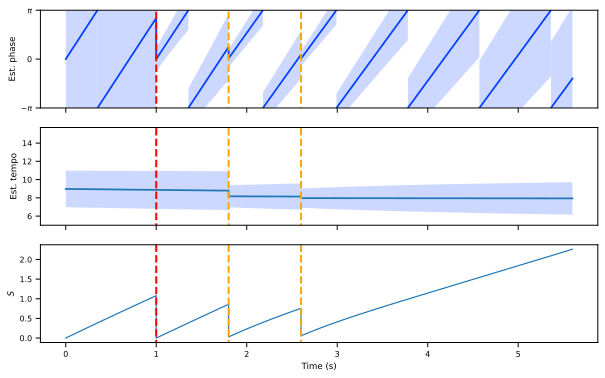

In [177]:
fig=utils.plot_vcPATIPPET(m_v_down,-1, 0, -1, '', [5, 2*np.pi/.4])
#fig.savefig('figures/vc_slowdown.pdf', bbox_inches='tight');

In [169]:
p_2 = PIPPET.PIPPETParams()
p_2.dt = 0.0005
p_2.overtime = .5
p_2.sigma_phi = 0.3
p_2.mu_0 = 0
p_2.V_0 = 1


p_2.eta_mu = 0.0
p_2.eta_V = 0.0


p_2.sigma_theta = 1#1#.25#0.12

p_2.tau_p = 2*np.pi/.54
p_2.tau_p_tendency = 0.00


e_means_2   = np.array([0, np.pi])
e_vars_2    = np.array([0.006,.1])/p_2.tau_p**2
e_lambdas_2 = np.array([0.04,.01])
lambda_0_2 = 0.01

p_2.tempo_scaling = True



In [174]:

## Adjust to a tempo drop and plot

p_g_down_2 = copy.deepcopy(p_2)


N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.54
tempo_mult = 1.2
e_times_2 = np.arange(1, N_PULSES_0*2+1) * period_0/2

e_times_2 = np.concatenate((e_times_2, np.arange(1, N_PULSES_1*2+1) *period_0/2*tempo_mult + e_times_2[-1]))


p_g_down_2.add(e_times_2, e_means_2, e_vars_2, e_lambdas_2, lambda_0_2, '')

m_g_down_2 = PIPPET.gcPATIPPET(p_g_down_2, taus=taus, prior=None)
m_g_down_2.run()


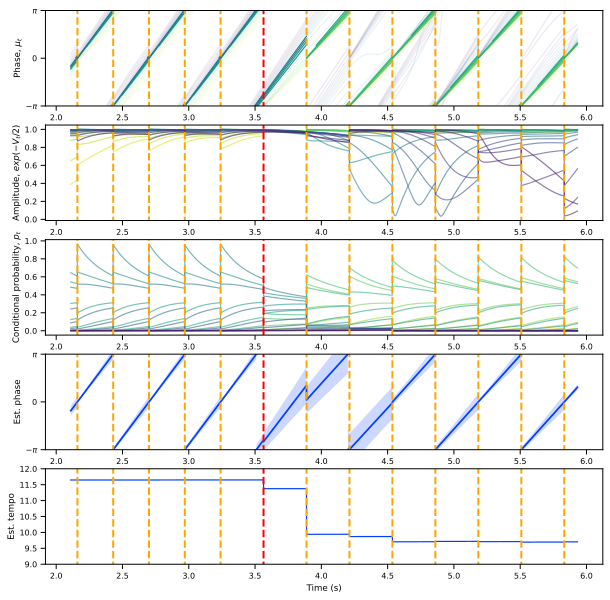

In [177]:
fig = plot_gcPATIPPET(m_g_down_2, N_PULSES_0*2-5, N_PULSES_0*2,  N_PULSES_0*2+7, 'first event at new tempo', .1/dtau, [9,12])
fig.savefig('figures/gc_slowdown_2.pdf', bbox_inches='tight');

In [170]:
p_v_down_2 = copy.deepcopy(p_2)

p_v_down_2.V_theta_0 = .1
p_v_down_2.S_0 = 0
p_v_down_2.theta_0 = 11.5

p_v_down_2.tempo_scaling = True

N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.54
tempo_mult = 1.2
e_times_2 = np.arange(1, N_PULSES_0*2+1) * period_0/2

e_times_2 = np.concatenate((e_times_2, np.arange(1, N_PULSES_1*2+1) *period_0/2*tempo_mult + e_times_2[-1]))

p_v_down_2.add(e_times_2, e_means_2, e_vars_2, e_lambdas_2, lambda_0_2, '')

m_v_down_2= PIPPET.vcPATIPPET(p_v_down_2)

m_v_down_2.run()
e_times_2


array([0.27 , 0.54 , 0.81 , 1.08 , 1.35 , 1.62 , 1.89 , 2.16 , 2.43 ,
       2.7  , 2.97 , 3.24 , 3.564, 3.888, 4.212, 4.536, 4.86 , 5.184,
       5.508, 5.832, 6.156, 6.48 ])

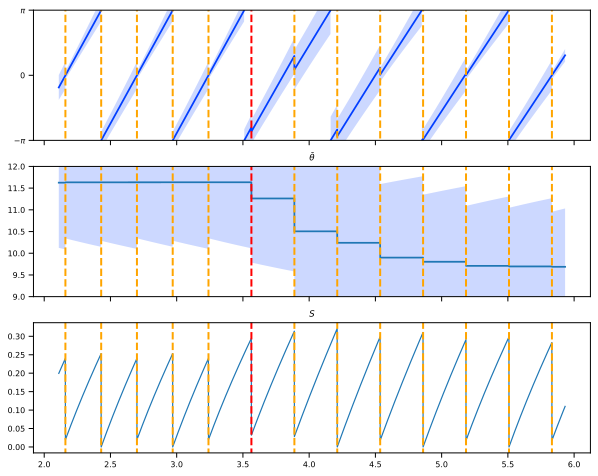

In [176]:
fig=plot_vcPATIPPET(m_v_down_2,N_PULSES_0*2-5, N_PULSES_0*2,  N_PULSES_0*2+7, 'first event at new tempo', [9,12])
fig.savefig('figures/vc_slowdown_2.pdf', bbox_inches='tight');

In [91]:
np.minimum(np.array([1,2,3]), 2)


array([1, 2, 2])